<a href="https://colab.research.google.com/github/LordAguaKate/Practica_DATA_SCIENCE/blob/main/2212_Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style='color: green; font-size: 36px; font-weight: bold;'><b>Regresión Lineal - Técnicas avanzadas de modelado</b></h1>

# <font color='red' style='font-size: 30px;'>1.2 Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

## El Dataset y el Proyecto
<hr>

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>El mercado inmobiliario ha sido objeto de diversos estudios e investigaciones en los últimos tiempos. La crisis financiera que afecta la economía ha impactado significativamente las inversiones y los beneficios provenientes de este sector. Este escenario fomenta un mayor interés en estudios de predicción de demanda basados en las características de este mercado, de los inmuebles y de su entorno.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>En este contexto, el objetivo principal de nuestro proyecto es desarrollar un sistema de evaluación inmobiliaria utilizando la metodología de regresiones lineales, que es una de las técnicas de <b>machine learning</b>.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nuestro <b>dataset</b> es una muestra aleatoria de tamaño 5000 de inmuebles disponibles para la venta en la ciudad de Cartagena.</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (USD) de oferta del inmueble</li>
    <li><b>Área</b> - Área del inmueble en m²</li>
    <li><b>Dist_Playa</b> - Distancia del inmueble hasta la playa (km) (en línea recta)</li>
    <li><b>Dist_Farmacia</b> - Distancia del inmueble hasta la farmacia más cercana (km) (en línea recta)</li>
</ul>

## Lectura de los datos

In [2]:
datos = pd.read_csv('dataset.csv', sep=';')

## Visualizar los datos

In [3]:
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Verificando el tamaño del dataset

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Valor          5000 non-null   int64  
 1   Area           5000 non-null   int64  
 2   Dist_Playa     5000 non-null   float64
 3   Dist_Farmacia  5000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 156.4 KB


# <font color='red' style='font-size: 30px;'>1.3 Análisis preliminar</font>
<hr style='border: 2px solid red;'>

## Estadística descriptiva

In [5]:
datos.describe()

,Valor,Area,Dist_Playa,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b>coeficiente de correlación</b> es una medida de asociación lineal entre dos variables y se sitúa entre <b>-1</b> y <b>+1</b>, donde <b>-1</b> indica una asociación negativa perfecta y <b>+1</b> indica una asociación positiva perfecta.</p>


In [6]:
datos.corr()

,Valor,Area,Dist_Playa,Dist_Farmacia
Valor,1.000000,0.710974,-0.366542,-0.024366
Area,0.710974,1.000000,-0.283371,-0.030990
Dist_Playa,-0.366542,-0.283371,1.000000,0.025645
Dist_Farmacia,-0.024366,-0.030990,0.025645,1.000000


# <font color='red' style='font-size: 30px;'>2.1 Comportamiento de la variable Dependiente (y)</font>
<hr style='border: 2px solid red;'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de Python para la visualización de datos basada en matplotlib. Proporciona una interfaz de alto nivel para crear gráficos estadísticos.</p>



In [7]:
import seaborn as sns

## Configuraciones para el formato de los gráficos

In [8]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

## Box plot de la variable *dependiente* (y)

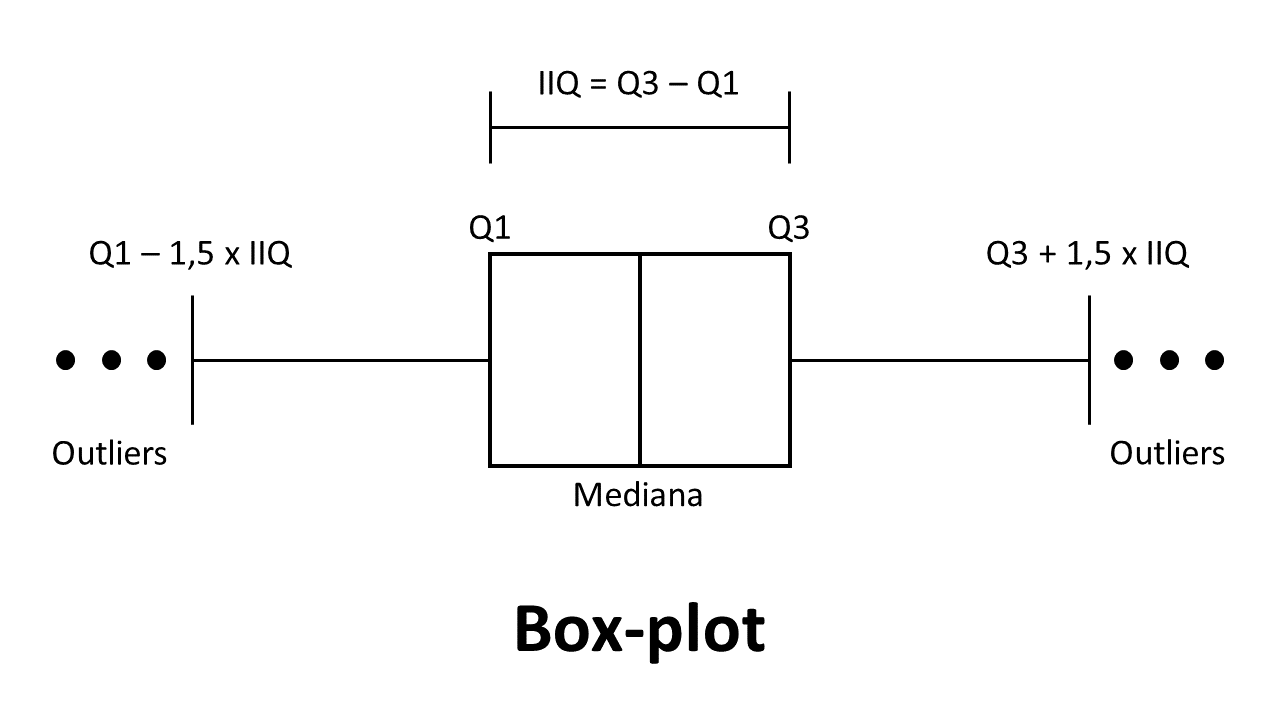

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

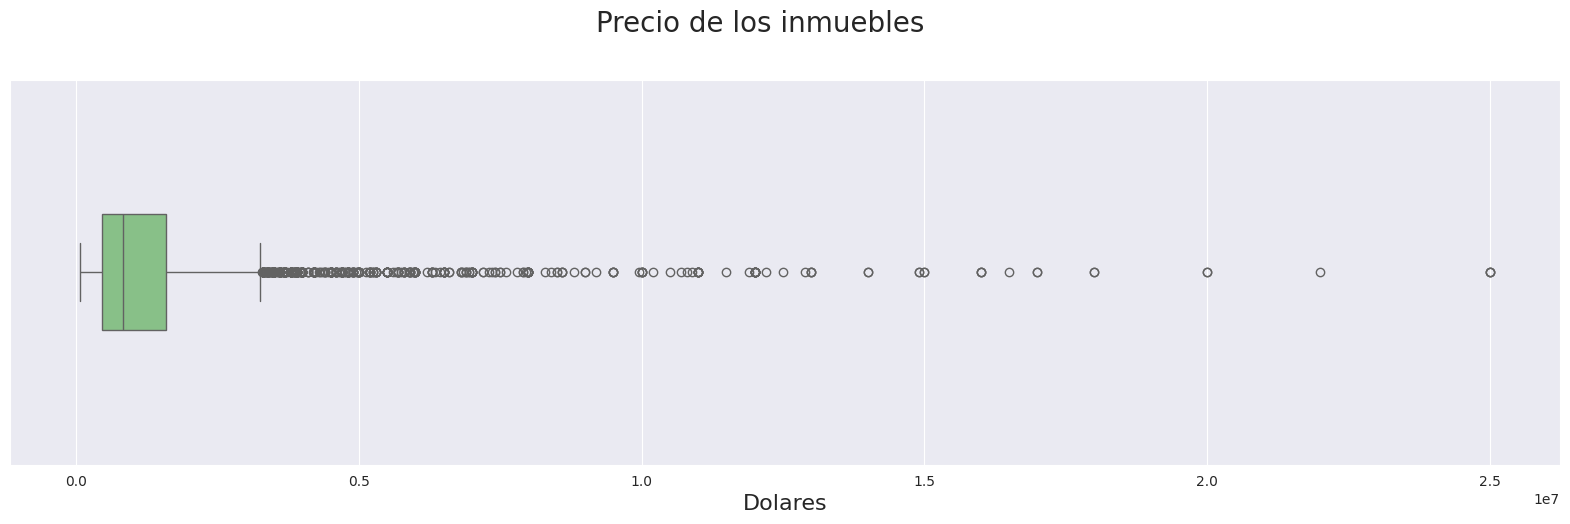

In [9]:
from numpy.random.mtrand import f
ax = sns.boxplot(
    data=datos['Valor'],
    orient='h',
    width=0.3
    )
ax.figure.set_size_inches(20, 5)
ax.figure.suptitle('Precio de los inmuebles', fontsize=20, y=1.02)
ax.set_xlabel('Dolares', fontsize=16)
ax;

# <font color='red' style='font-size: 30px;'>2.2 Distribución de Frecuencias</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot

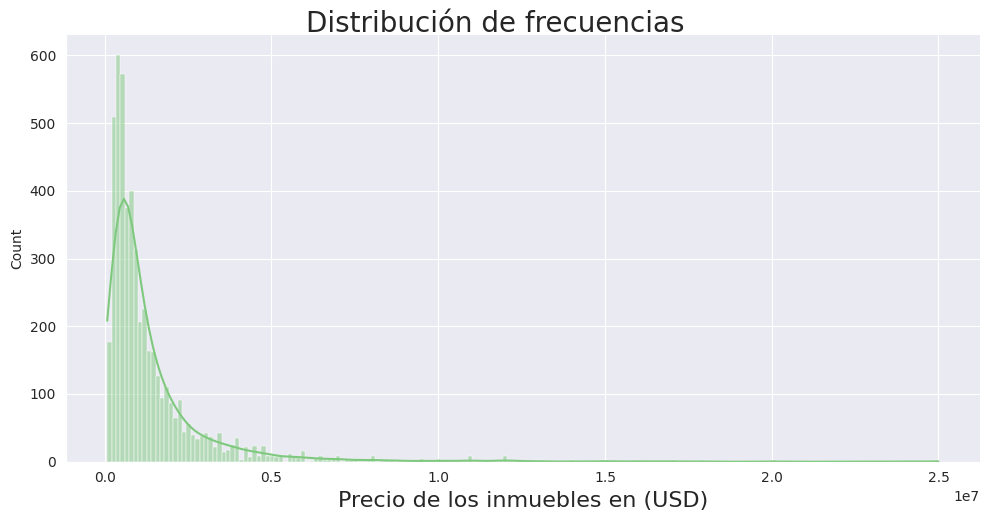

In [10]:
ax = sns.displot(
    data=datos['Valor'],
    kde=True,
    aspect=2
    )
ax.fig.suptitle(
    'Distribución de frecuencias',
    fontsize=20,
    y=1.02
    )
ax.set_xlabels(
    'Precio de los inmuebles en (USD)',
    fontsize=16
    )
ax;

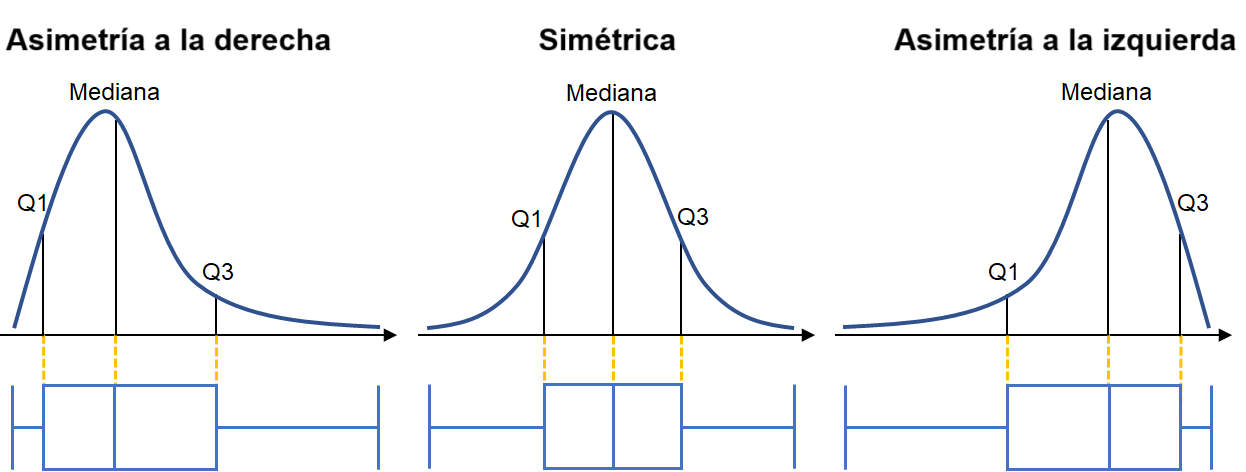

# <font color='red' style='font-size: 30px;'>2.3 Disperión entre las Variables</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

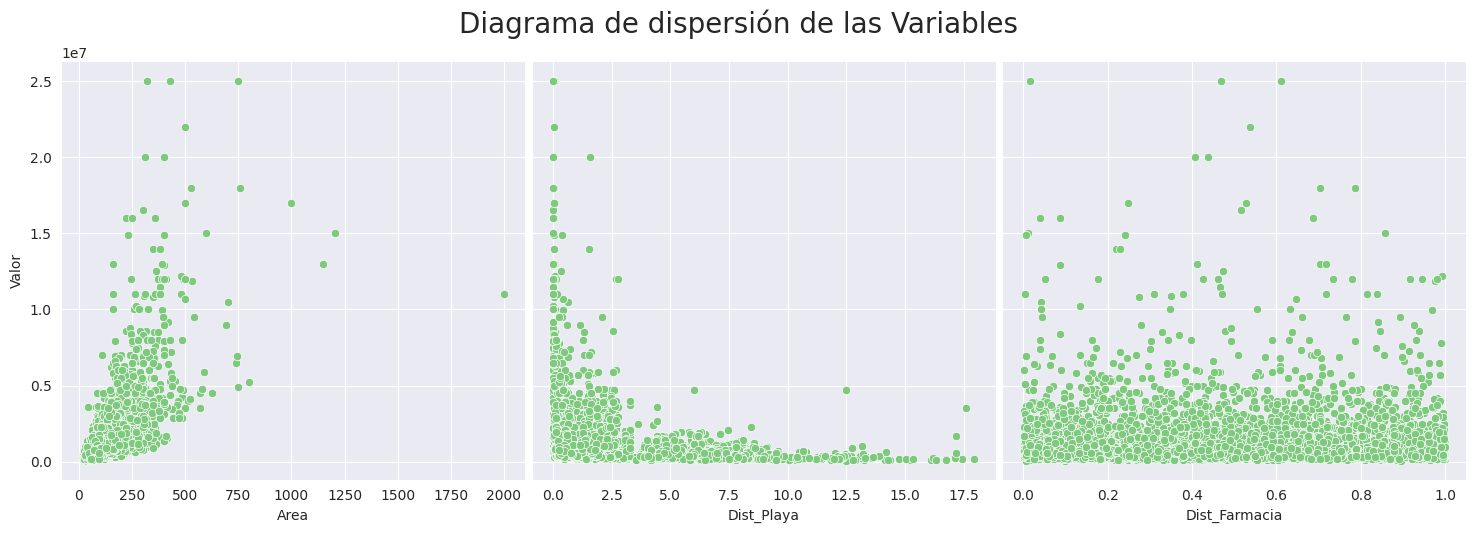

In [11]:
ax = sns.pairplot(
    datos, y_vars='Valor',
    x_vars=[
            'Area',
            'Dist_Playa',
            'Dist_Farmacia'
            ],
    height=5
    )
ax.fig.suptitle(
    'Diagrama de dispersión de las Variables',
    fontsize=20,
    y=1.05
    )
ax;

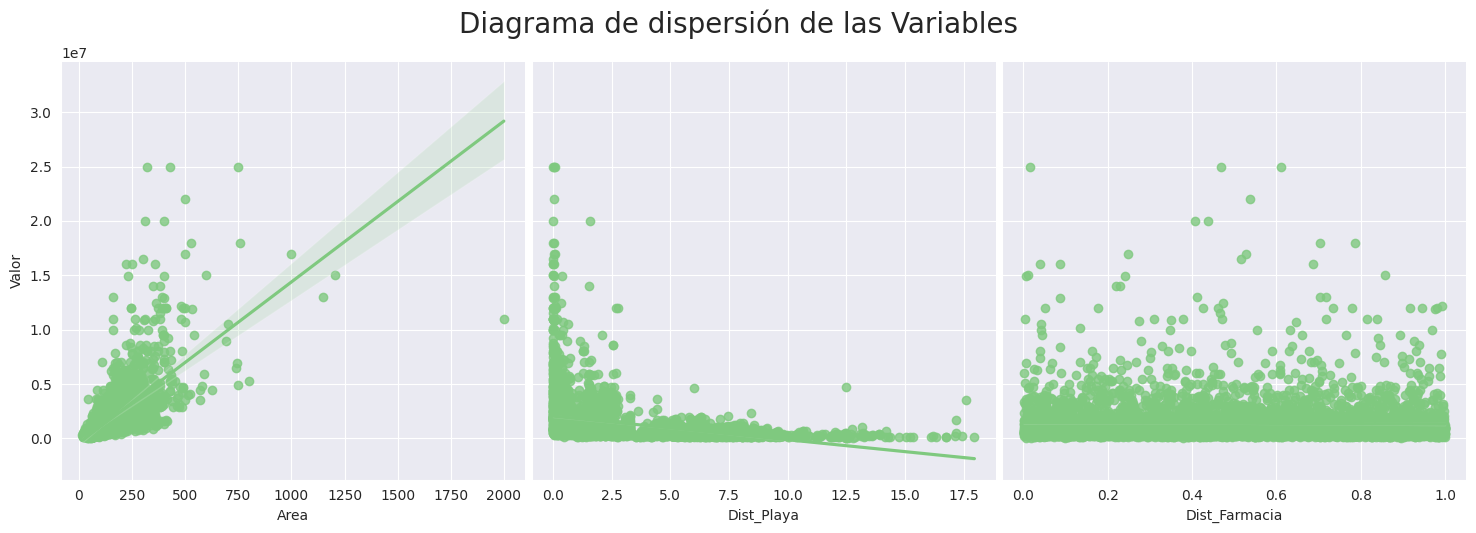

In [12]:
ax = sns.pairplot(
    datos, y_vars='Valor',
    x_vars=[
            'Area',
            'Dist_Playa',
            'Dist_Farmacia'
            ],
    kind='reg',
    height=5
    )
ax.fig.suptitle(
    'Diagrama de dispersión de las Variables',
    fontsize=20,
    y=1.05
    )
ax;

# <font color='red' style='font-size: 30px;'>3.1 Transformando los Datos</font>
<hr style='border: 2px solid red;'>

## Distribución Normal
<hr>

### ¿Por qué?
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Las pruebas paramétricas asumen que los datos de la muestra fueron recolectados de una población con una distribución de probabilidad conocida. Gran parte de las pruebas estadísticas asumen que los datos siguen una distribución normal (t de Student, intervalos de confianza, etc.).</p>


## Importando la biblioteca numpy

In [13]:
import numpy as np

## Aplicando la transformación logarítmica a los datos del *dataset*

https://numpy.org/doc/stable/reference/generated/numpy.log.html

In [14]:
np.log(1)

np.float64(0.0)

In [15]:
datos['log_valor'] = np.log(datos['Valor'])
datos['log_Area'] = np.log(datos['Area'])
datos['log_Dist_Playa'] = np.log(datos['Dist_Playa']+1)
datos['log_Dist_Farmacia'] = np.log(datos['Dist_Farmacia']+1)

In [16]:
datos.head()

,Valor,Area,Dist_Playa,Dist_Farmacia,log_valor,log_Area,log_Dist_Playa,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Distribución de frecuencia de la variable *dependiente transformada* (y)

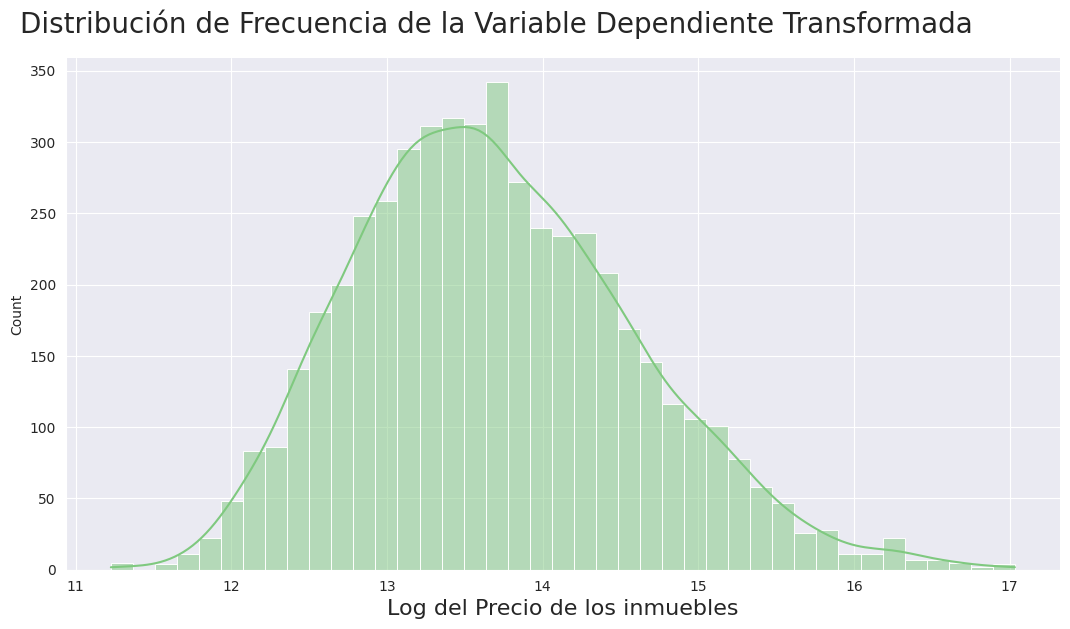

In [17]:
ax = sns.displot(
    datos['log_valor'],
    kde=True
)
ax.figure.set_size_inches(12, 6)
ax.fig.suptitle(
    'Distribución de Frecuencia de la Variable Dependiente Transformada',
    fontsize=20,
    y=1.05
    )
ax.set_xlabels('Log del Precio de los inmuebles', fontsize=16)
ax;

# <font color='red' style='font-size: 30px;'>3.2 Verificando La Relación Lineal</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión entre las variables transformadas del dataset

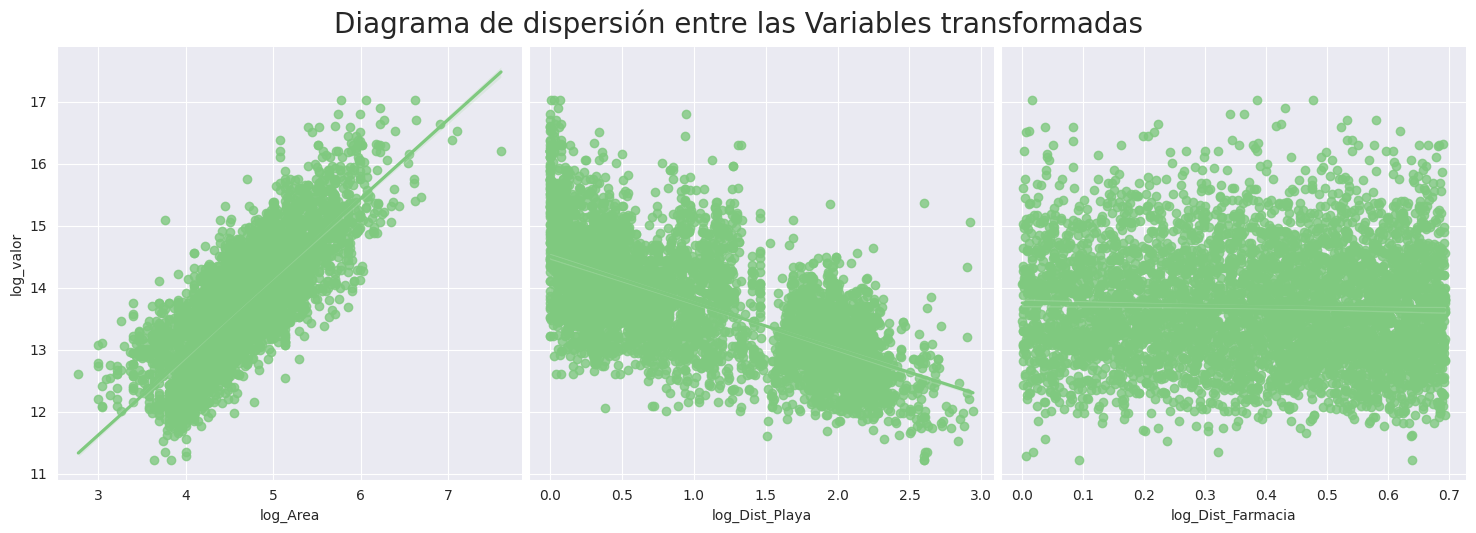

In [18]:
ax = sns.pairplot(
    datos, y_vars='log_valor',
    x_vars=[
            'log_Area',
            'log_Dist_Playa',
            'log_Dist_Farmacia'
            ],
    kind='reg',
    height=5
    )
ax.fig.suptitle(
    'Diagrama de dispersión entre las Variables transformadas',
    fontsize=20,
    y=1.05
    )
ax;

# <font color='red' style='font-size: 30px;'>4.1 Creando los *Datasets* de Entrenamiento y Prueba</font>
<hr style='border: 2px solid red;'>

## Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [19]:
from sklearn.model_selection import train_test_split

## Creando una Serie (pandas) para almacenar el Precio de los Inmuebles (y)

In [20]:
y = datos['log_valor']

## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [22]:
datos.columns

Index(['Valor', 'Area', 'Dist_Playa', 'Dist_Farmacia', 'log_valor', 'log_Area',
       'log_Dist_Playa', 'log_Dist_Farmacia'],
      dtype='object')

In [23]:
X = datos[['log_Area', 'log_Dist_Playa', 'log_Dist_Farmacia']]

## Criando los datasets de Entrenamiento y Prueba

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2811
    )

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b>dependiente</b>) con respecto a una o más variables, las variables explicativas, con el objetivo de estimar y/o predecir el valor medio de la primera en función de los valores conocidos o fijados en las últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'><b>scikit-learn</b> es un módulo de Python especializado en soluciones de <b>machine learning</b>.</p>




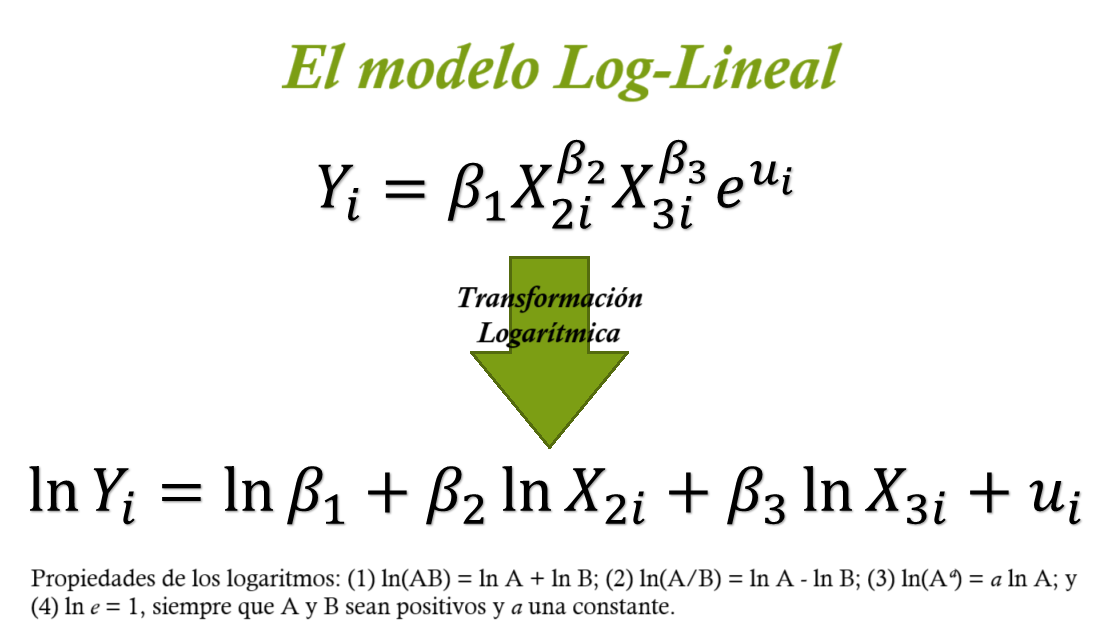

In [25]:
import statsmodels.api as sm

## Estimando el modelo con statsmodels

In [26]:
X_train_con_constante = sm.add_constant(X_train)

In [27]:
X_train_con_constante

,const,log_Area,log_Dist_Playa,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [28]:
modelo_statsmodels = sm.OLS(
    y_train,
    X_train_con_constante,
    hasconst=True
    ).fit()

# <font color='red' style='font-size: 30px;'>4.2 Evaluando el Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Evaluando los resultados del modelo

In [30]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Sun, 08 Feb 2026   Prob (F-statistic):               0.00
Time:                        20:05:17   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.06

# <font color='red' style='font-size: 30px;'>4.3 Modificando el Modelo y evaluando nuevamente el Ajuste</font>
<hr style='border: 2px solid red;'>

## Creando un nuevo conjunto de variables explicativas (X)

## Creando los datasets de entrenamiento y prueba

## Estimando el modelo con statsmodels

## Evaluando los resultados de prueba del nuevo modelo

### Prueba de significancia conjunta de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Prob (F-statistic) <= 0.05 (<b>OK</b>)</p>

### Prueba de significancia individual de los parámetros
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>P>|t| <= 0.05 (<b>OK</b>)</p>

# <font color='red' style='font-size: 30px;'>5.1 Estimando el Modelo con los Datos de Entrenamiento</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* y *metrics* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

## Instanciando la clase *LinearRegression()*

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal utilizando los datos de Entrenamiento (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de Entrenamiento

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de Determinación (R²) es una medida resumida que muestra qué tanto la línea de regresión se ajusta a los datos. Es un valor entre 0 y 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Generando las previsiones para los datos de Prueba (X_test) utilizando el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

## Obteniendo el coeficiente de Determinación (R²) para las previsiones de nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

# <font color='red' style='font-size: 30px;'>5.2 Obteniendo Previsiones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

## Generando previsión puntual

## Invertiendo la transformación para obtener el valor estimado en dólares (USD)

https://numpy.org/doc/stable/reference/generated/numpy.exp.html

## Creando un simulador simple

# <font color='red' style='font-size: 30px;'>5.3 Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obteniendo la intersección del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>La <b>intersección</b> representa el efecto medio en $y$ (Precio de los Inmuebles) cuando todas las variables explicativas son excluidas del modelo. En el caso del modelo log-lineal, este coeficiente debe transformarse usando la función exponencial para ser presentado en USD.</p>



## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b>coeficientes de regresión</b> $\beta_2$ y $\beta_3$ son conocidos como <b>coeficientes parciales de regresión</b> o <b>coeficientes parciales angulares</b>. </p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Un aspecto interesante del modelo log-lineal, que lo convirtió en muy utilizado en los trabajos aplicados, es que los coeficientes angulares $\beta_2$ y $\beta_3$ miden las elasticidades de Y con respecto a $X_2$ y $X_3$, es decir, la variación porcentual de $y$ correspondiente a una determinada variación porcentual (pequeña) en $X_2$ y $X_3$.</p>

## Confirmando el orden de las variables explicativas en el DataFrame

## Creando una lista con los nombres de las variables del modelo

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

## Interpretación de los Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluyendo el efecto de las variables explicativas ($X_2=X_3=0$), el efecto medio en el Precio de los Inmuebles sería de <b>USD 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Manteniendo constante el valor de $X_3$ (Distancia hasta la Playa), un incremento del 1% en el Área de un inmueble genera, en promedio, un aumento de <b>1.06%</b> en el Precio del Inmueble.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distancia hasta la Playa (km)</b> → Manteniendo constante el valor de $X_2$ (Área), un incremento del 1% en la Distancia de un inmueble hasta la playa genera, en promedio, una disminución de <b>0.49%</b> en el Precio del Inmueble.
</p>

# <font color='red' style='font-size: 30px;'>5.4 Análisis Gráfico de los Resultados del Modelo</font>
<hr style='border: 2px solid red;'>

## Generando las previsiones del modelo para los datos de Entrenamiento

## Gráfico de dispersión entre el valor estimado y el valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

## Obteniendo los resíduos

## Graficando la distribución de frecuencias de los resíduos